<a href="https://colab.research.google.com/github/siobhanloughney/ds1002-sel6nzy/blob/main/lab2_race_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 2: Determine Race Results with R

In this lab you will work with a dataset, writing R to generate the deliverables specified in the cells below.

The dataset for this lab is made up of fictitious results from a road race. Runner information and results is provided in the data.

Answer the questions below with the appropriate R code. Point assignments are indicated for each section. There are 10 total points possible for this lab.

Useful reference material (check all R modules within the Canvas site for more help)
- [R Reference Material](https://canvas.its.virginia.edu/courses/78571/modules#module_219810).
- [Plots Samples](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/25-plots-in-r.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data (1 pt)

https://raw.githubusercontent.com/nmagee/ds1002/main/data/road-race.csv

Import any necessary libraries and load the remote CSV file below into a data frame.

In [30]:
#
install.packages("tidyverse")
library(tidyverse)
library(ggplot2)
install.packages("gridExtra")
library(gridExtra)
road_race <- read_csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/road-race.csv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 764 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): runner_name, runner_gender
dbl  (2): runner_bib, runner_age
time (1): finish_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [31]:
#
str(road_race)

spc_tbl_ [764 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ runner_bib   : num [1:764] 1 2 3 4 5 6 7 8 9 10 ...
 $ runner_name  : chr [1:764] "Loydie Lopes" "Lorens Crispe" "Shirline Hasser" "Alleyn Hartshorn" ...
 $ runner_age   : num [1:764] 17 33 22 39 50 44 51 44 30 60 ...
 $ runner_gender: chr [1:764] "Male" "Male" "Female" "Male" ...
 $ finish_time  : 'hms' num [1:764] 16:01:00 15:40:00 14:20:00 17:06:00 ...
  ..- attr(*, "units")= chr "secs"
 - attr(*, "spec")=
  .. cols(
  ..   runner_bib = col_double(),
  ..   runner_name = col_character(),
  ..   runner_age = col_double(),
  ..   runner_gender = col_character(),
  ..   finish_time = col_time(format = "")
  .. )
 - attr(*, "problems")=<externalptr> 


## 3. Clean and Organize the Data (2 pts)

Check for data quality.

- Resolve any duplicate rows.
- If a runner does not have a finish time, they are DNF and should not be counted in the dataset.



In [36]:
#
road_race <- road_race[!duplicated(road_race),]
rr <- road_race %>% drop_na(finish_time)


Now display the first 10 rows of the cleaned dataset.

In [37]:
#
rr[1:10,]

runner_bib,runner_name,runner_age,runner_gender,finish_time
<dbl>,<chr>,<dbl>,<chr>,<time>
1,Loydie Lopes,17,Male,16:01:00
2,Lorens Crispe,33,Male,15:40:00
3,Shirline Hasser,22,Female,14:20:00
4,Alleyn Hartshorn,39,Male,17:06:00
5,Wang MacColl,50,Male,16:49:00
6,Tonnie Tidder,44,Male,15:43:00
8,Basil Moxsom,44,Male,15:16:00
9,Lark Bragge,30,Female,15:59:00
10,Kent Wakely,60,Male,14:29:00


## 4. Calculate Elapsed Time (3 pts)

Using R, add a new column named `["finish_minutes"]` to the dataframe that calculates the number of minutes it took for the runner to complete the race. Ideally this is a column consisting of plain integers.

The starting gun was fired at precisely 12:00pm that day.

Note: This is calculated using a built-in function of R, `difftime()` which takes 3 parameters:

- End time
- Start time
- Units

The result is an output that figures the difference between the two: `3 days`, `14 years`, `112 mins`, etc.

The syntax for that function is below. Take care to use the proper order of parameters. The `as.POSIXct` casting makes it possible to read a long datetime in the `YYYY-MM-DDTHH:MM` format, a common `datetime` value. The `format` parameter specifies the pattern you are trying to read.

```
df$new-column <- (difftime( as.POSIXct(df$end-column, format="%Y-%m-%dT%H:%M"),
                            as.POSIXct(df$start-column, format="%Y-%m-%dT%H:%M"),
                            units="min"))
```

In [38]:
start_time <- "1970-01-01 12:00:00"
rr$finish_minutes <- (difftime(as.POSIXct(rr$finish_time, format="%Y-%m-%dT%H:%M"), start_time, units="min"))
rr$finish_minutes <- as.integer(rr$finish_minutes)
rr

runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
<dbl>,<chr>,<dbl>,<chr>,<time>,<int>
1,Loydie Lopes,17,Male,16:01:00,241
2,Lorens Crispe,33,Male,15:40:00,220
3,Shirline Hasser,22,Female,14:20:00,140
4,Alleyn Hartshorn,39,Male,17:06:00,306
5,Wang MacColl,50,Male,16:49:00,289
6,Tonnie Tidder,44,Male,15:43:00,223
8,Basil Moxsom,44,Male,15:16:00,196
9,Lark Bragge,30,Female,15:59:00,239
10,Kent Wakely,60,Male,14:29:00,149


## 5. Identify Winners by Gender (2 pts)

Based on the minutes it took each runner to complete the race, identify the top three places for each gender.

There are several ways to do this, some of which require less code than others. You will only be graded for producing the correct output, not on how elegant/advanced your programming is.

In [49]:
rr_genders <- rr %>%
  group_by(runner_gender)%>%
  summarize()
rr_genders

runner_gender
<chr>
Agender
Bigender
Female
Genderfluid
Genderqueer
Male
Non-binary
Polygender


In [58]:
#
rr_agender <- rr %>%
   filter(runner_gender == "Agender")%>%
  arrange(finish_minutes)
rr_agender[1:3,]

rr_bigender <- rr %>%
  filter(runner_gender == "Bigender")%>%
  arrange(finish_minutes)
rr_bigender[1:3,]


rr_female <- rr %>%
  filter(runner_gender == "Female")%>%
  arrange(finish_minutes)
rr_female[1:3,]

rr_genderfluid <- rr %>%
  filter(runner_gender == "Genderfluid")%>%
  arrange(finish_minutes)
rr_genderfluid[1:3,]


rr_genderqueer <- rr %>%
  filter(runner_gender == "Genderqueer")%>%
  arrange(finish_minutes)
rr_genderqueer[1:3,]

rr_male <- rr %>%
  filter(runner_gender == "Male")%>%
  arrange(finish_minutes)
rr_male[1:3,]

rr_nonbinary <- rr %>%
  filter(runner_gender == "Non-binary")%>%
  arrange(finish_minutes)
rr_nonbinary[1:3,]

rr_polygender <- rr %>%
  filter(runner_gender == "Polygender")%>%
  arrange(finish_minutes)
rr_polygender[1:3,]


runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
<dbl>,<chr>,<dbl>,<chr>,<time>,<int>
321,Jacobo Telling,33,Agender,14:47:00,167
480,Tomasina Greensall,22,Agender,15:12:00,192
332,Ina Bonifant,30,Agender,15:17:00,197


runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
<dbl>,<chr>,<dbl>,<chr>,<time>,<int>
249,Sephira Kirgan,33,Bigender,14:24:00,144
546,Chauncey Langthorne,16,Bigender,14:29:00,149
263,Ernestus Draper,45,Bigender,14:58:00,178


runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
<dbl>,<chr>,<dbl>,<chr>,<time>,<int>
21,Carmencita Petrishchev,20,Female,14:15:00,135
134,Marylin Standering,18,Female,14:15:00,135
238,Melloney Fonteyne,20,Female,14:15:00,135


runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
<dbl>,<chr>,<dbl>,<chr>,<time>,<int>
152,Patrice Draye,18,Genderfluid,14:15:00,135
606,Nonna Restill,57,Genderfluid,14:24:00,144
421,Neysa Willatt,60,Genderfluid,14:33:00,153


runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
<dbl>,<chr>,<dbl>,<chr>,<time>,<int>
547,Patin Dawidowitsch,17,Genderqueer,15:27:00,207
527,Bobby Sykes,52,Genderqueer,15:28:00,208
590,Abigale Beedle,41,Genderqueer,15:34:00,214


runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
<dbl>,<chr>,<dbl>,<chr>,<time>,<int>
393,Ker Dearden,62,Male,14:15:00,135
114,Arin Maffezzoli,52,Male,14:18:00,138
325,Holt Teissier,36,Male,14:18:00,138


runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
<dbl>,<chr>,<dbl>,<chr>,<time>,<int>
341,Gaylor Buckett,17,Non-binary,14:29:00,149
38,Mellie Merryfield,54,Non-binary,15:03:00,183
426,Base Dukes,62,Non-binary,15:19:00,199


runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
<dbl>,<chr>,<dbl>,<chr>,<time>,<int>
283,Karyl Pyne,38,Polygender,14:21:00,141
356,Alair Blyde,42,Polygender,14:27:00,147
578,Dagmar Bedburrow,47,Polygender,14:49:00,169


## 6. Plot the Data (3 pts)

Finally, using `ggplot2` create two plots of the data -- density plots of race finishers.

- In the first plot use `finish_minutes` as the x axis.
- In the second plot use `runner_age` as the x axis.
- Use `runner_gender` as the fill.
- We suggest using a `geom_density(alpha=0.2)` or therabouts to see layers through one another.
- Use the `gridExtra` library's `grid.arrange()` method to plot them both.

You will note that since this is artificial data you will be able to see the gender layers clearly enough but they will not be statistically meaningful.

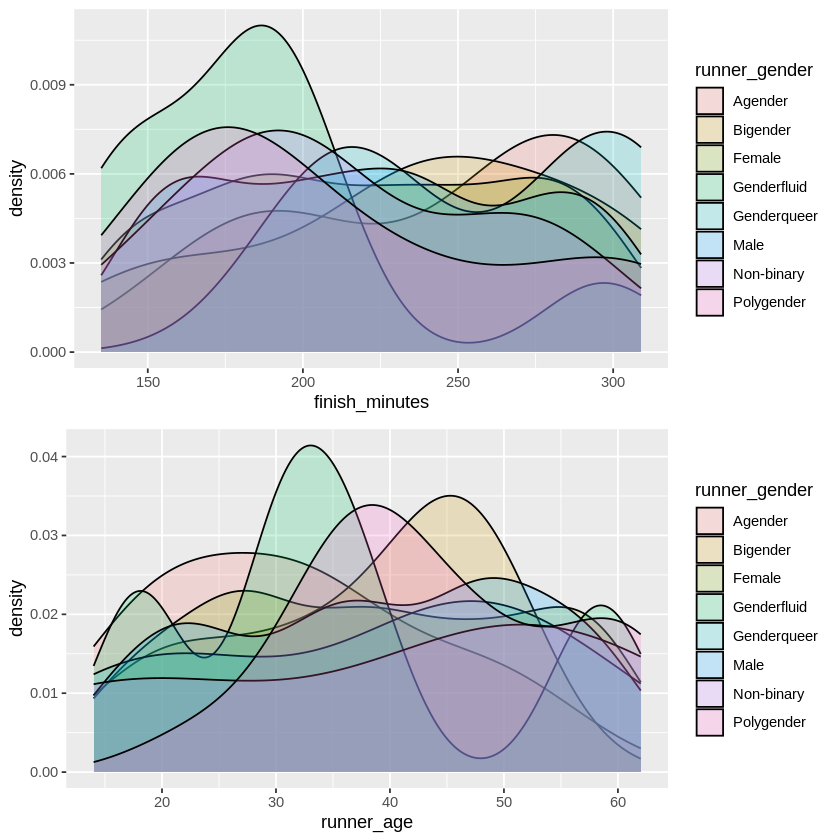

In [61]:
#
time <- ggplot(rr, aes(x = finish_minutes, fill = runner_gender)) +
geom_density(alpha=0.2)

age <- ggplot(rr, aes(x = runner_age, fill = runner_gender)) +
geom_density(alpha=0.2)

grid.arrange(time, age, nrow = 2)